# Part 2. Case Studies and Cost of Conflict by Countries 

Part 1. In this part, several time series plots were generated for selected countries (such as Burundi, Liberia, Angola, China, Thailand) to show past changes in conflict, GDP per capita, and other selected economic indicators for each country throughout time. The past cost of conflict for these countries were estimated taking the difference between lowest and highest points of GDP per capita or the other economic indicators throughout time while conflict being at its highest vs. lowest point, respectively and dividing the difference by the value of the highest point. Because I had a shortage of time, the estimations of cost of conflict for these countries are very rough and might change significantly when a more thorough estimation is done. The estimations were done to show the effect of conflict on economy for selected countries in the past. The next section estimates the future (or predicted) cost of conflict for selected countries.    

Part 2. Future cost of conflict per day was also estimated for the countries such as Rwanda, Cambodia, Uganda, Mozambique, Vietnam, Nigeria. In this case, a different strategy was used to make the estimations. The assumption was made that future conflict in each country would last for at least one year. Then a series of regressions were performed to predict future cost of conflict using GDP per capita and Trade of each aforementioned country. Specially, regression coefficients of conflict predicting GDP per capita and Trade were divided by mean GDP per capita or Trade, respectively, to obtain percentage change in GDP per capita and Trade per one point increase in conflict. In case of GDP per capita, the percentage change in GDP per capita was multiplied by mean GDP and divided by 365 days to estimate the cost of conflict per day. To estimate the cost of conflict for 2 points increase in conflict, the estimated number was multiplied by two. In case of Trade, the percentage change in Trade was multiplied by mean GDP and mean Trade divided by 100 and then divided by 365. Again, to make estimations for 2-point increase in conflict, the estimated number was multiplied by two. 


In [1]:
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from linearmodels import PanelOLS
import numpy as np
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('data.csv')
# df.info()

## Part 1. Case studies and estimations of past cost of conflict

Several time series plots were generated for selected countries (such as Burundi, Liberia, Angola, China, Thailand) to show past changes in conflict, GDP per capita, and other selected economic indicators for each country throughout time. The past cost of conflict for these countries were estimated taking the difference between lowest and highest points of GDP per capita or the other economic indicators throughout time while conflict being at its highest vs. lowest point, respectively and dividing the difference by the value of the highest point. The estimations were done to show the effect of conflict on economy for selected countries in the past.     

### BURUNDI - Case# 1

In [6]:
# selecting data frame for Burundi

df_burundi=df.loc[df['country_name']=="Burundi"]

In [9]:
# estimating past cost of conflict based on GDP per capita
(df_burundi['gdp_capita'].max()-230)/df_burundi['gdp_capita'].max()*100

31.893896262047804

In [10]:
# estimating past cost of conflict based on Trade
(df_burundi['trade'].max()-df_burundi['trade'].min())/df_burundi['trade'].max()*100

61.286514406441754

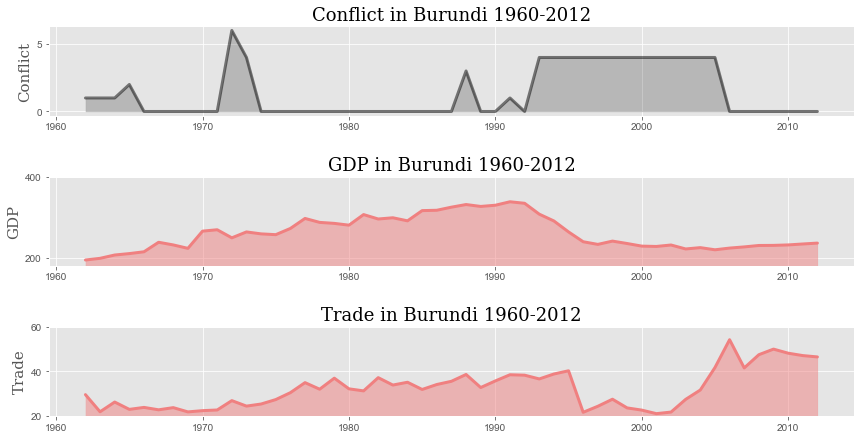

In [174]:
# plotting time series to show changes in conflict, GDP per capita, and Trade throughout time

plt.style.use('ggplot')

df_burundi.index = df_burundi['year'];

fig, axes = plt.subplots(3,1, figsize=(12,6))
plt.tight_layout(h_pad=4)
sns.set(font_scale=1.5)

axes[0].plot(df_burundi.index,df_burundi['conflict'], color='black',alpha=.5,lw=3);
axes[0].fill_between(df_burundi.index,df_burundi['conflict'], color='black', alpha=.2)
axes[0].set_ylabel('Conflict',fontsize=15,family="serif");
axes[0].set_title('Conflict in Burundi 1960-2012',family="serif");


axes[1].plot(df_burundi.index,df_burundi['gdp_capita'], color='lightcoral', lw=3);
axes[1].fill_between(df_burundi.index,df_burundi['gdp_capita'], color='lightcoral', alpha=.5)
axes[1].set_ylabel('GDP',fontsize=15,family="serif");
axes[1].set_title('GDP in Burundi 1960-2012',family="serif");
axes[1].set_ylim([180,400])


axes[2].plot(df_burundi.index,df_burundi['trade'], color='lightcoral', lw=3);
axes[2].fill_between(df_burundi.index,df_burundi['trade'], color='lightcoral', alpha=.5)
axes[2].set_ylabel('Trade',fontsize=15,family="serif");
axes[2].set_title('Trade in Burundi 1960-2012',family="serif");
axes[2].set_ylim([20,60])






plt.show()

 Other indicators in Burundi showed no change with conflict or had no data

### LIBERIA - Case# 2

In [175]:
# selecting data frame for Burundi
df_liberia=df.loc[df['country_name']=="Liberia"]


In [177]:
# estimating past cost of conflict based on GDP per capita

(df_liberia['gdp_capita'].max()-df_liberia['gdp_capita'].min())/df_liberia['gdp_capita'].max()*100

93.119218287827806

In [178]:
# estimating past cost of conflict based on Food Production Index

(100-70)/100

0.3

(30, 150)

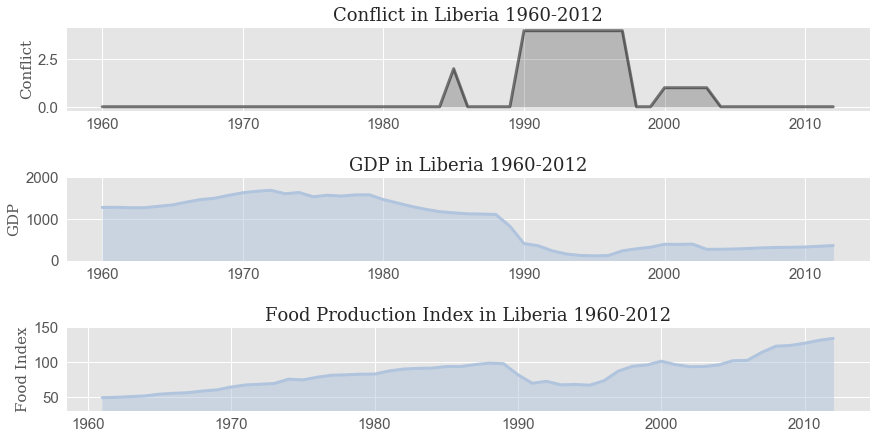

In [180]:
# plotting time series to show changes in conflict, GDP per capita, and Food Index throughout time

plt.style.use('ggplot')

df_liberia.index = df_liberia['year'];

fig, axes = plt.subplots(3,1, figsize=(12,6))
plt.tight_layout(h_pad=4)
sns.set(font_scale=1.5)

axes[0].plot(df_liberia.index,df_liberia['conflict'], color='black',alpha=.5,lw=3);
axes[0].fill_between(df_liberia.index,df_liberia['conflict'], color='black', alpha=.2)
axes[0].set_ylabel('Conflict',fontsize=15,family="serif");
axes[0].set_title('Conflict in Liberia 1960-2012',family="serif");


axes[1].plot(df_liberia.index,df_liberia['gdp_capita'], color='lightsteelblue', lw=3);
axes[1].fill_between(df_liberia.index,df_liberia['gdp_capita'], color='lightsteelblue', alpha=.5)
axes[1].set_ylabel('GDP',fontsize=15,family="serif");
axes[1].set_title('GDP in Liberia 1960-2012',family="serif");
axes[1].set_ylim([0,2000])

axes[2].plot(df_liberia.index,df_liberia['food_index'], color='lightsteelblue', lw=3);
axes[2].fill_between(df_liberia.index,df_liberia['food_index'], color='lightsteelblue', alpha=.5)
axes[2].set_ylabel('Food Index',fontsize=15,family="serif");
axes[2].set_title('Food Production Index in Liberia 1960-2012',family="serif");
axes[2].set_ylim([30,150])





 Other indicators in Liberia showed no change with conflict or had no data

### Angola - Case # 3

In [16]:
# estimating past cost of conflict based on GDP per capita

(3800-1800)/3800

0.5263157894736842

In [17]:
# estimating past cost of conflict based on Food Index

(190-30)/190

0.8421052631578947

In [18]:
#selecting data frame for Angola

df_angola=df.loc[df['country_name']=="Angola"]

(0, 200)

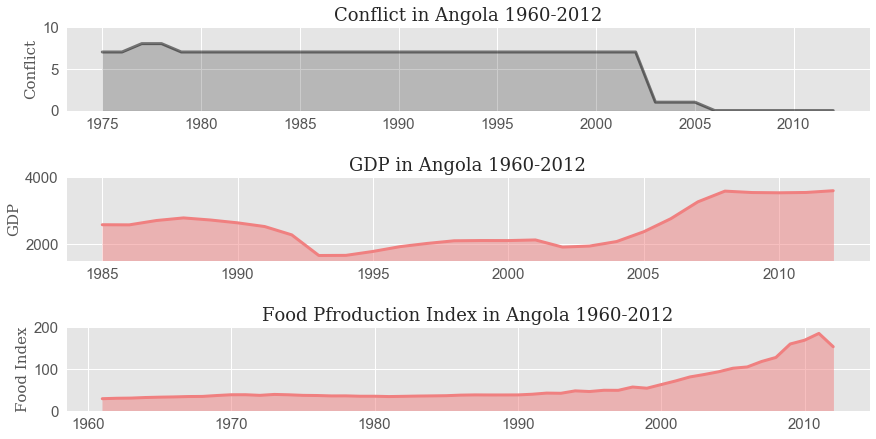

In [20]:
# plotting time series to show changes in conflict, GDP per capita, and Food Index throughout time

plt.style.use('ggplot')

df_angola.index = df_angola['year'];

fig, axes = plt.subplots(3,1, figsize=(12,6))
plt.tight_layout(h_pad=4)
sns.set(font_scale=1.5)

axes[0].plot(df_angola.index,df_angola['conflict'], color='black',alpha=.5,lw=3);
axes[0].fill_between(df_angola.index,df_angola['conflict'], color='black', alpha=.2)
axes[0].set_ylabel('Conflict',fontsize=15,family="serif");
axes[0].set_title('Conflict in Angola 1960-2012',family="serif");
axes[0].set_ylim([0,10])

axes[1].plot(df_angola.index,df_angola['gdp_capita'], color='lightcoral', lw=3);
axes[1].fill_between(df_angola.index,df_angola['gdp_capita'], color='lightcoral', alpha=.5)
axes[1].set_ylabel('GDP',fontsize=15,family="serif");
axes[1].set_title('GDP in Angola 1960-2012',family="serif");
axes[1].set_ylim([1500,4000])

axes[2].plot(df_angola.index,df_angola['food_index'], color='lightcoral', lw=3);
axes[2].fill_between(df_angola.index,df_angola['food_index'], color='lightcoral', alpha=.5)
axes[2].set_ylabel('Food Index',fontsize=15,family="serif");
axes[2].set_title('Food Pfroduction Index in Angola 1960-2012',family="serif");
axes[2].set_ylim([0,200])





### China - Case # 4

In [21]:
#selecting data frame for China

df_china=df.loc[df['country_name']=="China"]


In [22]:
# estimating past cost of conflict based on GDP per capita

(df_china['gdp_capita'].max()-df_china['gdp_capita'].min())/df_china['gdp_capita'].max()*100

97.526951196884212

In [24]:
# estimating past cost of conflict based on Food Index

(df_china['food_index'].max()-df_china['food_index'].min())/df_china['food_index'].max()*100

89.539617914187289

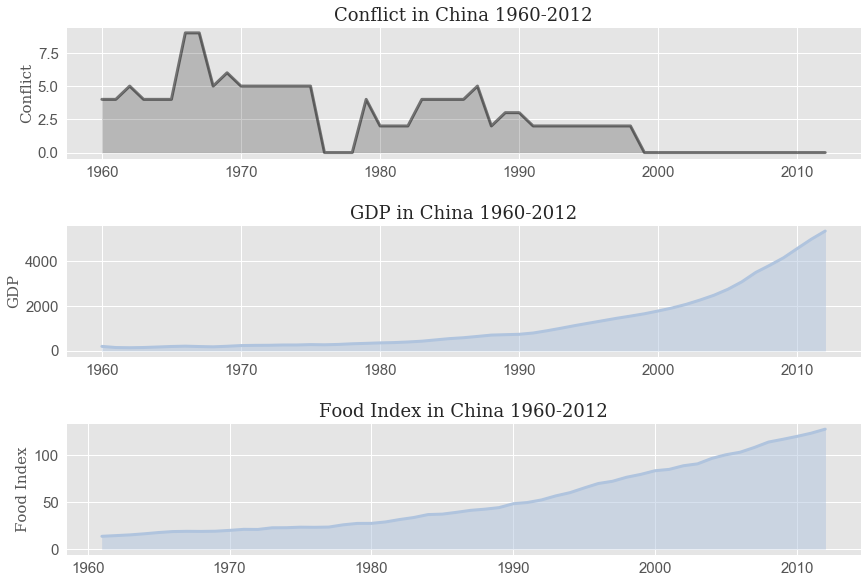

In [22]:
# plotting time series to show changes in conflict, GDP per capita, and Food Index throughout time



plt.style.use('ggplot')

df_china.index = df_china['year'];

fig, axes = plt.subplots(3,1, figsize=(12,8))
plt.tight_layout(h_pad=4)
sns.set(font_scale=1.5)

axes[0].plot(df_china.index,df_china['conflict'], color='black',alpha=.5,lw=3);
axes[0].fill_between(df_china.index,df_china['conflict'], color='black', alpha=.2)
axes[0].set_ylabel('Conflict',fontsize=15,family="serif");
axes[0].set_title('Conflict in China 1960-2012',family="serif");


axes[1].plot(df_china.index,df_china['gdp_capita'], color='lightsteelblue', lw=3);
axes[1].fill_between(df_china.index,df_china['gdp_capita'], color='lightsteelblue', alpha=.5)
axes[1].set_ylabel('GDP',fontsize=15,family="serif");
axes[1].set_title('GDP in China 1960-2012',family="serif");
# axes[1].set_ylim([180,400])

axes[2].plot(df_china.index,df_china['food_index'], color='lightsteelblue', lw=3);
axes[2].fill_between(df_china.index,df_china['food_index'], color='lightsteelblue', alpha=.5)
axes[2].set_ylabel('Food Index',fontsize=15,family="serif");
axes[2].set_title('Food Index in China 1960-2012',family="serif");
# axes[2].set_ylim([30,150])


### Thailand - Case # 5

In [25]:
#selecting data frame for Thailand

df_thailand=df.loc[df['country_name']=="Thailand"]


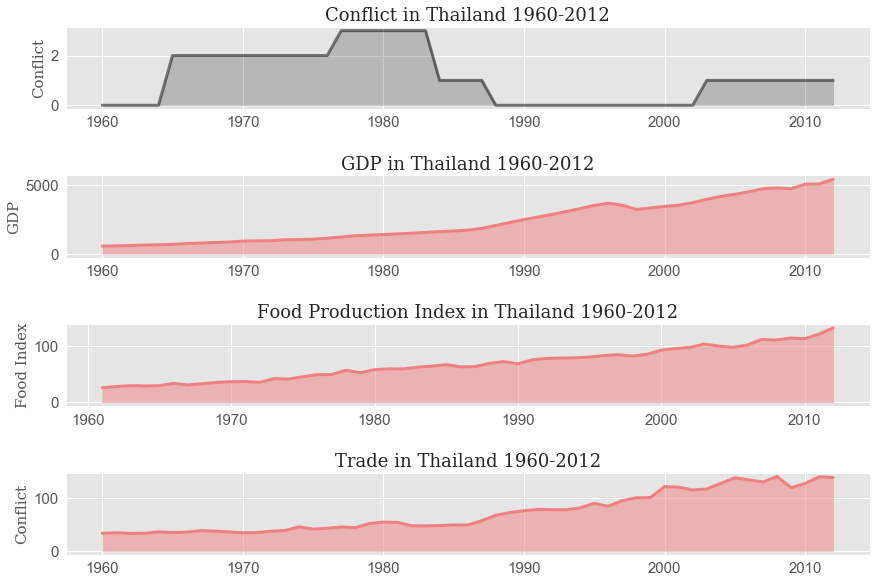

In [189]:
# plotting time series to show changes in conflict, GDP per capita, Food Index, and Trade throughout time


plt.style.use('ggplot')

df_thailand.index = df_thailand['year'];

fig, axes = plt.subplots(4,1, figsize=(12,8))
plt.tight_layout(h_pad=4)
sns.set(font_scale=1.5)

axes[0].plot(df_thailand.index,df_thailand['conflict'], color='black',alpha=.5,lw=3);
axes[0].fill_between(df_thailand.index,df_thailand['conflict'], color='black', alpha=.2)
axes[0].set_ylabel('Conflict',fontsize=15,family="serif");
axes[0].set_title('Conflict in Thailand 1960-2012',family="serif");


axes[1].plot(df_thailand.index,df_thailand['gdp_capita'], color='lightcoral', lw=3);
axes[1].fill_between(df_thailand.index,df_thailand['gdp_capita'], color='lightcoral', alpha=.5)
axes[1].set_ylabel('GDP',fontsize=15,family="serif");
axes[1].set_title('GDP in Thailand 1960-2012',family="serif");
# axes[1].set_ylim([180,400])

axes[2].plot(df_thailand.index,df_thailand['food_index'], color='lightcoral', lw=3);
axes[2].fill_between(df_thailand.index,df_thailand['food_index'], color='lightcoral', alpha=.5)
axes[2].set_ylabel('Food Index',fontsize=15,family="serif");
axes[2].set_title('Food Production Index in Thailand 1960-2012',family="serif");
# axes[2].set_ylim([30,150])

axes[3].plot(df_thailand.index,df_thailand['trade'], color='lightcoral', lw=3);
axes[3].fill_between(df_thailand.index,df_thailand['trade'], color='lightcoral', alpha=.5)
axes[3].set_ylabel('Conflict',fontsize=15,family="serif");
axes[3].set_title('Trade in Thailand 1960-2012',family="serif");



In [190]:
# estimating past cost of conflict based on GDP per capita

(df_thailand['gdp_capita'].max()-df_thailand['gdp_capita'].min())/df_thailand['gdp_capita'].max()*100

89.500972088564566

In [31]:
# estimating past cost of conflict based on Trade

(df_thailand['trade'].max()-df_thailand['trade'].min())/df_thailand['trade'].max()*100

76.262532087518053

In [32]:
# estimating past cost of conflict based on Food Index

(df_thailand['food_index'].max()-df_thailand['food_index'].min())/df_thailand['food_index'].max()*100

80.119164341202193

## Part 2. Estimations of future cost of conflict

Future cost of conflict per day was also estimated for the countries such as Rwanda, Cambodia, Uganda, Mozambique, Vietnam, Nigeria. In this case, a different strategy was used to make the estimations. The assumption was made that future conflict in each country would last for at least one year. Then a series of regressions were performed to predict future cost of conflict using GDP per capita and Trade of each aforementioned country. Specially, regression coefficients of conflict predicting GDP per capita and Trade were divided by mean GDP per capita or Trade, respectively, to obtain percentage change in GDP per capita and Trade per one point increase in conflict. In case of GDP per capita, the percentage change in GDP per capita was multiplied by mean GDP and divided by 365 days to estimate the cost of conflict per day. To estimate the cost of conflict for 2 points increase in conflict, the estimated number was multiplied by two. In case of Trade, the percentage change in Trade was multiplied by mean GDP and mean Trade divided by 100 and then divided by 365. Again, to make estimations for 2-point increase in conflict, the estimated number was multiplied by two. 

### Rwanda

In [26]:
#selecting data frame for Rwanda

df_rwanda=df.loc[df['country_name']=="Rwanda"]

In [28]:
# estimating the future cost of conflict based on GDP per capita

model2 = smf.ols(formula = 'gdp_capita ~ conflict', data = df_rwanda).fit()
change=model2.params[1]/df_rwanda['gdp_capita'].mean()

average_capita=df_rwanda['gdp_capita'].mean()
average_gdp=df_rwanda['gdp'].mean()
cost_day_gdp=(average_gdp*(change*2))/365


print ('Average GDP per capita for Rwanda: %.2f'% (average_capita))
print ('Average GDP for Rwanda: %.2f'% (average_gdp))
print('Percentage change per 1 point in conflict for Rwanda: %.2f%%' % (100 * change))
print ('Cost per day GDP (US dollars): %.2f'% (cost_day_gdp))
print()
print()
print()
print(model2.summary())


Average GDP per capita for Rwanda: 372.20
Average GDP for Rwanda: 2416976711.21
Percentage change per 1 point in conflict for Rwanda: -4.86%
Cost per day GDP (US dollars): -643480.09



                            OLS Regression Results                            
Dep. Variable:             gdp_capita   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     12.15
Date:                Tue, 08 May 2018   Prob (F-statistic):            0.00105
Time:                        15:45:54   Log-Likelihood:                -292.40
No. Observations:                  51   AIC:                             588.8
Df Residuals:                      49   BIC:                             592.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef   

In [29]:
# estimating the future cost of conflict based on Trade

model2 = smf.ols(formula = 'trade ~ conflict', data = df_rwanda).fit()
change=model2.params[1]/df_rwanda['trade'].mean()

average_trade=df_rwanda['trade'].mean()
average_gdp=df_rwanda['gdp'].mean()

trade_cost=((average_gdp*(average_trade/100)*(change*2))/365)

print ('Average GDP for Rwanda: %.2f'% (average_trade))
print('Percentage change per 1 point in conflict for Rwanda: %.2f%%' % (100 * change))
print ('Cost of trade per day for Rwanda (US dollars): %.2f'% (trade_cost))
print()
print()
print()
print(model2.summary())

Average GDP for Rwanda: 31.66
Percentage change per 1 point in conflict for Rwanda: 2.20%
Cost of trade per day for Rwanda (US dollars): 92265.84



                            OLS Regression Results                            
Dep. Variable:                  trade   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.400
Date:                Tue, 08 May 2018   Prob (F-statistic):              0.242
Time:                        15:46:16   Log-Likelihood:                -181.41
No. Observations:                  51   AIC:                             366.8
Df Residuals:                      49   BIC:                             370.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [

### Cambodia

In [31]:
#selecting data frame for Cambodia

df_cambodia=df.loc[df['country_name']=="Cambodia"]

In [33]:
# estimating the future cost of conflict based on GDP per capita

model2 = smf.ols(formula = 'gdp_capita ~ conflict', data = df_cambodia).fit()
change=model2.params[1]/df_cambodia['gdp_capita'].mean()

average_capita=df_cambodia['gdp_capita'].mean()
average_gdp=df_cambodia['gdp'].mean()
cost_day_gdp=(average_gdp*(change*2))/365
cost_day_capita=(average_capita*(change*2))/365

print ('Average GDP per capita for Cambodia: %.2f'% (average_capita))
print ('Average GDP for Cambodia: %.2f'% (average_gdp))
print('Percentage change per 1 point in conflict for Cambodia: %.2f%%' % (100 * change))

print ('Cost per day GDP (US dollars): %.2f'% (cost_day_gdp))
print()
print()
print()
print(model2.summary())

Average GDP per capita for Cambodia: 545.21
Average GDP for Cambodia: 7114027227.15
Percentage change per 1 point in conflict for Cambodia: -24.98%
Cost per day GDP (US dollars): -9735703.90



                            OLS Regression Results                            
Dep. Variable:             gdp_capita   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     12.48
Date:                Tue, 08 May 2018   Prob (F-statistic):            0.00238
Time:                        15:47:25   Log-Likelihood:                -127.44
No. Observations:                  20   AIC:                             258.9
Df Residuals:                      18   BIC:                             260.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                

In [35]:
# estimating the future cost of conflict based Trade


model2 = smf.ols(formula = 'trade ~ conflict', data = df_cambodia).fit()
change=model2.params[1]/df_cambodia['trade'].mean()

average_trade=df_cambodia['trade'].mean()
average_gdp=df_cambodia['gdp'].mean()

trade_cost=((average_gdp*(average_trade/100)*(change*2))/365)

print ('Average GDP for Cambodia: %.2f'% (average_trade))
print('Percentage change per 1 point in conflict for Cambodia: %.2f%%' % (100 * change))
print ('Cost of trade per day for Cambodia (US dollars): %.2f'% (trade_cost))
print()
print()
print()
print(model2.summary())

Average GDP for Cambodia: 77.56
Percentage change per 1 point in conflict for Cambodia: -14.27%
Cost of trade per day for Cambodia (US dollars): -4313898.16



                            OLS Regression Results                            
Dep. Variable:                  trade   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     2.384
Date:                Tue, 08 May 2018   Prob (F-statistic):              0.133
Time:                        15:48:45   Log-Likelihood:                -160.29
No. Observations:                  31   AIC:                             324.6
Df Residuals:                      29   BIC:                             327.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P

### Uganda

In [36]:
#selecting data frame for Uganda

df_uganda=df.loc[df['country_name']=="Uganda"]

In [40]:
# estimating the future cost of conflict based on GDP per capita

model2 = smf.ols(formula = 'gdp_capita ~ conflict', data = df_uganda).fit()
change=model2.params[1]/df_uganda['gdp_capita'].mean()

average_capita=df_uganda['gdp_capita'].mean()
average_gdp=df_uganda['gdp'].mean()
cost_day_gdp=(average_gdp*(change*2))/365
cost_day_capita=(average_capita*(change*2))/365

print ('Average GDP per capita for Uganda: %.2f'% (average_capita))
print ('Average GDP for Uganda: %.2f'% (average_gdp))
print('Percentage change per 1 point in conflict for Uganda: %.2f%%' % (100 * change))
print ('Cost per day GDP (US dollars): %.2f'% (cost_day_gdp))
print()
print()
print()
print(model2.summary())

Average GDP per capita for Uganda: 405.19
Average GDP for Uganda: 10024349675.68
Percentage change per 1 point in conflict for Uganda: -14.43%
Cost per day GDP (US dollars): -7925391.51



                            OLS Regression Results                            
Dep. Variable:             gdp_capita   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     33.99
Date:                Tue, 08 May 2018   Prob (F-statistic):           2.54e-06
Time:                        15:50:31   Log-Likelihood:                -178.24
No. Observations:                  31   AIC:                             360.5
Df Residuals:                      29   BIC:                             363.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef

In [41]:
# estimating the future cost of conflict based on Trade

model2 = smf.ols(formula = 'trade ~ conflict', data = df_uganda).fit()
change=model2.params[1]/df_uganda['trade'].mean()

average_trade=df_uganda['trade'].mean()
average_gdp=df_uganda['gdp'].mean()

trade_cost=((average_gdp*(average_trade/100)*(change*2))/365)

print ('Average GDP for Uganda: %.2f'% (average_trade))
print('Percentage change per 1 point in conflict for Uganda: %.2f%%' % (100 * change))
print ('Cost of trade per day for Uganda (US dollars): %.2f'% (trade_cost))
print()
print()
print()
print(model2.summary())

Average GDP for Uganda: 36.61
Percentage change per 1 point in conflict for Uganda: -10.31%
Cost of trade per day for Uganda (US dollars): -2073668.08



                            OLS Regression Results                            
Dep. Variable:                  trade   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     54.84
Date:                Tue, 08 May 2018   Prob (F-statistic):           1.56e-09
Time:                        15:50:32   Log-Likelihood:                -170.37
No. Observations:                  51   AIC:                             344.7
Df Residuals:                      49   BIC:                             348.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|  

### Mozambique

In [43]:
#selecting data frame for Mozambique
df_mozambique=df.loc[df['country_name']=="Mozambique"]

In [44]:
# estimating the future cost of conflict based on GDP per capita

model2 = smf.ols(formula = 'gdp_capita ~ conflict', data = df_mozambique).fit()
change=model2.params[1]/df_mozambique['gdp_capita'].mean()

average_capita=df_mozambique['gdp_capita'].mean()
average_gdp=df_mozambique['gdp'].mean()
cost_day_gdp=(average_gdp*(change*2))/365
cost_day_capita=(average_capita*(change*2))/365

print ('Average GDP per capita for Mozambique: %.2f'% (average_capita))
print ('Average GDP for Mozambique: %.2f'% (average_gdp))
print('Percentage change per 1 point in conflict for Mozambique: %.2f%%' % (100 * change))
print ('Cost per day GDP (US dollars): %.2f'% (cost_day_gdp))
print()
print()
print()
print(model2.summary())

Average GDP per capita for Mozambique: 248.92
Average GDP for Mozambique: 4653235110.09
Percentage change per 1 point in conflict for Mozambique: -9.34%
Cost per day GDP (US dollars): -2380282.59



                            OLS Regression Results                            
Dep. Variable:             gdp_capita   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     26.37
Date:                Tue, 08 May 2018   Prob (F-statistic):           1.46e-05
Time:                        15:51:52   Log-Likelihood:                -188.28
No. Observations:                  33   AIC:                             380.6
Df Residuals:                      31   BIC:                             383.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
           

In [45]:
# estimating the future cost of conflict based on Trade

model2 = smf.ols(formula = 'trade ~ conflict', data = df_mozambique).fit()
change=model2.params[1]/df_mozambique['trade'].mean()

average_trade=df_mozambique['trade'].mean()
average_gdp=df_mozambique['gdp'].mean()

trade_cost=((average_gdp*(average_trade/100)*(change*2))/365)

print ('Average GDP for Mozambique: %.2f'% (average_trade))
print('Percentage change per 1 point in conflict for Mozambique: %.2f%%' % (100 * change))
print ('Cost of trade per day for Mozambique (US dollars): %.2f'% (trade_cost))
print()
print()
print()
print(model2.summary())

Average GDP for Mozambique: 55.83
Percentage change per 1 point in conflict for Mozambique: -8.87%
Cost of trade per day for Mozambique (US dollars): -1262326.18



                            OLS Regression Results                            
Dep. Variable:                  trade   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     24.87
Date:                Tue, 08 May 2018   Prob (F-statistic):           2.23e-05
Time:                        15:52:44   Log-Likelihood:                -138.22
No. Observations:                  33   AIC:                             280.4
Df Residuals:                      31   BIC:                             283.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t  

### Vietnam

In [47]:
#selecting data frame for Vietnam

df_vietnam=df.loc[df['country_name']=="Vietnam"]

In [48]:
# estimating the future cost of conflict based on GDP per capita

model2 = smf.ols(formula = 'gdp_capita ~ conflict', data = df_vietnam).fit()
change=model2.params[1]/df_vietnam['gdp_capita'].mean()

average_capita=df_vietnam['gdp_capita'].mean()
average_gdp=df_vietnam['gdp'].mean()
cost_day_gdp=(average_gdp*(change*2))/365
cost_day_capita=(average_capita*(change*2))/365

print ('Average GDP per capita for Vietnam: %.2f'% (average_capita))
print ('Average GDP for Vietnam: %.2f'% (average_gdp))
print('Percentage change per 1 point in conflict for Vietnam: %.2f%%' % (100 * change))
print ('Cost per day GDP (US dollars): %.2f'% (cost_day_gdp))
print()
print()
print()
print(model2.summary())

Average GDP per capita for Vietnam: 782.61
Average GDP for Vietnam: 61333967990.41
Percentage change per 1 point in conflict for Vietnam: -9.43%
Cost per day GDP (US dollars): -31693284.81



                            OLS Regression Results                            
Dep. Variable:             gdp_capita   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     12.52
Date:                Tue, 08 May 2018   Prob (F-statistic):            0.00148
Time:                        15:54:40   Log-Likelihood:                -204.27
No. Observations:                  29   AIC:                             412.5
Df Residuals:                      27   BIC:                             415.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 c

In [49]:
# estimating the future cost of conflict based on Trade

model2 = smf.ols(formula = 'trade ~ conflict', data = df_vietnam).fit()
change=model2.params[1]/df_vietnam['trade'].mean()

average_trade=df_vietnam['trade'].mean()
average_gdp=df_vietnam['gdp'].mean()

trade_cost=((average_gdp*(average_trade/100)*(change*2))/365)

print ('Average GDP for Vietnam: %.2f'% (average_trade))
print('Percentage change per 1 point in conflict for Vietnam: %.2f%%' % (100 * change))
print ('Cost of trade per day for Vietnam (US dollars): %.2f'% (trade_cost))
print()
print()
print()
print(model2.summary())

Average GDP for Vietnam: 101.10
Percentage change per 1 point in conflict for Vietnam: -12.83%
Cost of trade per day for Vietnam (US dollars): -43599728.00



                            OLS Regression Results                            
Dep. Variable:                  trade   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     25.44
Date:                Tue, 08 May 2018   Prob (F-statistic):           3.33e-05
Time:                        15:54:54   Log-Likelihood:                -129.48
No. Observations:                  27   AIC:                             263.0
Df Residuals:                      25   BIC:                             265.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>

### Nigeria

In [50]:
#selecting data frame for Nigeria

df_nigeria=df.loc[df['country_name']=="Nigeria"]

In [51]:
# estimating the future cost of conflict based on GDP per capita

model2 = smf.ols(formula = 'gdp_capita ~ conflict', data = df_nigeria).fit()
change=model2.params[1]/df_nigeria['gdp_capita'].mean()

average_capita=df_nigeria['gdp_capita'].mean()
average_gdp=df_nigeria['gdp'].mean()
cost_day_gdp=(average_gdp*(change*2))/365
cost_day_capita=(average_capita*(change*2))/365

print ('Average GDP per capita for Nigeria: %.2f'% (average_capita))
print ('Average GDP for Nigeria: %.2f'% (average_gdp))
print('Percentage change per 1 point in conflict for Nigeria: %.2f%%' % (100 * change))
print ('Cost per day GDP (US dollars): %.2f'% (cost_day_gdp))
print()
print()
print()
print(model2.summary())

Average GDP per capita for Nigeria: 1582.86
Average GDP for Nigeria: 151025906901.00
Percentage change per 1 point in conflict for Nigeria: -1.13%
Cost per day GDP (US dollars): -9378359.04



                            OLS Regression Results                            
Dep. Variable:             gdp_capita   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.5239
Date:                Tue, 08 May 2018   Prob (F-statistic):              0.472
Time:                        15:56:10   Log-Likelihood:                -386.93
No. Observations:                  53   AIC:                             777.9
Df Residuals:                      51   BIC:                             781.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 

In [53]:
# estimating the future cost of conflict based on Trade

model2 = smf.ols(formula = 'trade ~ conflict', data = df_nigeria).fit()
change=model2.params[1]/df_nigeria['trade'].mean()

average_trade=df_nigeria['trade'].mean()
average_gdp=df_nigeria['gdp'].mean()

trade_cost=((average_gdp*(average_trade/100)*(change*2))/365)

print ('Average GDP for Nigeria: %.2f'% (average_trade))
print('Percentage change per 1 point in conflict for Nigeria: %.2f%%' % (100 * change))
print ('Cost of trade per day for Nigeria (US dollars): %.2f'% (trade_cost))
print()
print()
print()
print(model2.summary())

Average GDP for Nigeria: 44.60
Percentage change per 1 point in conflict for Nigeria: -0.49%
Cost of trade per day for Nigeria (US dollars): -1809381.74



                            OLS Regression Results                            
Dep. Variable:                  trade   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                   0.03435
Date:                Tue, 08 May 2018   Prob (F-statistic):              0.854
Time:                        15:56:44   Log-Likelihood:                -225.55
No. Observations:                  53   AIC:                             455.1
Df Residuals:                      51   BIC:                             459.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|